In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploads = files.upload()

Saving loan_data_processed.csv to loan_data_processed.csv


In [4]:
df = pd.read_csv('loan_data_processed.csv')

In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


We do not use validation dataset above as it is not needed for simple classification

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train the models
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [8]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

# Predict probabilities
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf.predict_proba(X_test_scaled)[:,1]
# computing ROC AND AUC

In [10]:
fpr_log, tpr_log, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

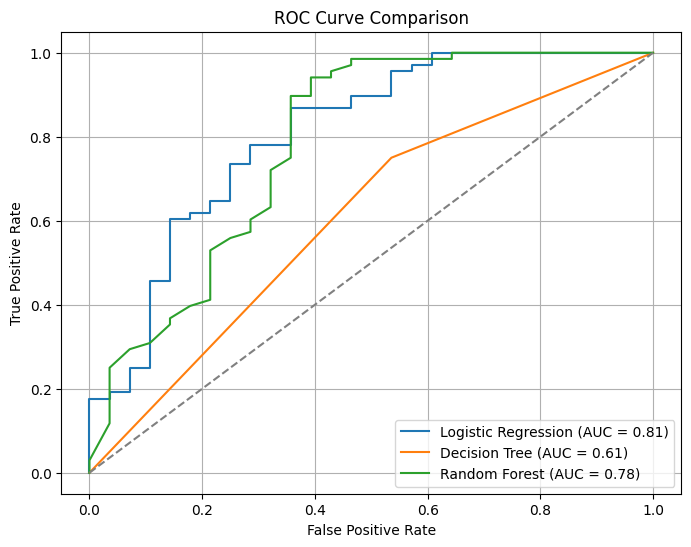

In [13]:
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

As logistic regression gives an AUC of 0.81 we move ahead with logistic regression

In [14]:
y_pred = lr.predict(X_test_scaled)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

Confusion Matrix:
[[11 17]
 [ 0 68]]


**Conclusion**

Class 0 (Loan Rejected):
Precision = 1.00 → Every time the model predicted "No", it was right (11/11).

Recall = 0.39 → Out of all actual "No" cases, it only caught 39% (11 out of 28).

F1 Score = 0.56

Class 1 (Loan Approved):
Precision = 0.80 → Of all the "Yes" predictions, 80% were actually correct.

Recall = 1.00 → It captured all approved loans — perfect sensitivity.

F1 Score = 0.89
Accuracy = 82%
Weighted Avg (weighted by support/class size)

F1: 0.79 — more reliable in imbalanced cases


As this dataset was imbalanced the output is pretty good
